# Manual Neural Network

## In this notebook we will manually build out a neural network that mimics the TensorFlow API.

## Operations

#### We create a class call Operation() and then inherit its methods to the actual operations like addition, multiplication and matmul

In [119]:
class Operation():
    
    def __init__(self, input_nodes = []):
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            
            node.output_nodes.append(self)
    
        _default_graph.operations.append(self)
        
    def compute(self):
        pass

In [120]:
class add(Operation):
    
    def __init__(self, x, y):
        
        super().__init__([x, y])
        
    def compute(self, x_var, y_var):
        
        self.inputs = [x_var, y_var]
        return x_var + y_var

In [121]:
class multiply(Operation):
    
    def __init__(self, x, y):
        
        super().__init__([x, y])
        
    def compute(self, x_var, y_var):
        
        self.inputs = [x_var, y_var]
        return x_var * y_var

In [122]:
class matmul(Operation):
    
    def __init__(self, x, y):
        
        super().__init__([x, y])
        
    def compute(self, x_var, y_var):
        
        self.inputs = [x_var, y_var]
        return x_var.dot(y_var)

## Now, we need to create a placeholder and variables and the Graph is the global variable that would connect the placeholders and variables to the operations.

In [123]:
class Placeholder():
    
    def __init__(self):
        
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

In [124]:
class Variable():
    
    def __init__(self, initial_value = None):
        
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)

In [125]:
class Graph():
    
    def __init__(self):
        
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        
        global _default_graph
        _default_graph = self

## Now let's test this on the equation z = Ax + b, A = 10, b = 1

In [147]:
g = Graph()

In [148]:
g.set_as_default()

In [149]:
A = Variable(10)

In [150]:
b = Variable(1)

In [151]:
x = Placeholder()

In [152]:
y = multiply(A, x)

In [153]:
z = add(y, b)

# Session

In [154]:
import numpy as np

## Post Order Traversal function

In [155]:
def traverse_postorder(operation):

    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    return nodes_postorder

## Feed dictionary maps placeholders to input values

In [156]:
class Session:
    
    def run(self, operation, feed_dict = {}):
        """ 
          operation: The operation to compute
          feed_dict: Dictionary mapping placeholders to input values (the data)  
        """
        
        # Puts nodes in correct order
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:

            if type(node) == Placeholder:
                
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                
                node.output = node.value
                
            else: # Operation
                
                node.inputs = [input_node.output for input_node in node.input_nodes]

                 
                node.output = node.compute(*node.inputs)
                
            # Convert lists to numpy arrays
            if type(node.output) == list:
                node.output = np.array(node.output)
        
        # Return the requested node value
        return operation.output


In [157]:
sess = Session()

In [158]:
result = sess.run(operation = z, feed_dict = {x : 10})

In [159]:
result

101

## Lets try with the input as a matrix

In [160]:
g = Graph()

g.set_as_default()

A = Variable([[10, 20], [30, 40]])

b = Variable([1, 1])

x = Placeholder()

y = matmul(A, x)

z = add(y, b)

In [161]:
sess = Session()

In [162]:
sess.run(operation = z, feed_dict = {x:10})

array([[101, 201],
       [301, 401]])

# Classification
## Now lets perform a simple linear classification

## Activation Function

In [168]:
import matplotlib.pyplot as plt
%matplotlib inline

In [169]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [170]:
sample_z = np.linspace(-10, 10, 100)
sample_a = sigmoid(sample_z)

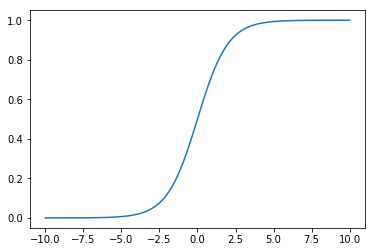

In [167]:
plt.plot(sample_z, sample_a)

# Sigmoid as an Operation

In [205]:
class Sigmoid(Operation):
    
    def __init__(self, z):
        
        super().__init__([z])
        
    def compute(self, z_val):
        
        return(1/(1 + np.exp(-z_val)))

### SciKit learn has a function to create datasets for us

In [206]:
from sklearn.datasets import make_blobs

In [207]:
data = make_blobs(n_samples = 50, n_features = 2, centers = 2)

In [208]:
data[1]

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

In [209]:
features = data[0]
labels = data[1]

In [210]:
plt.scatter(features[:, 0], featur es[:, 1], c =labels)

SyntaxError: invalid syntax (<ipython-input-210-ba22532d9270>, line 1)

### Lets use our neural network to separate these classes

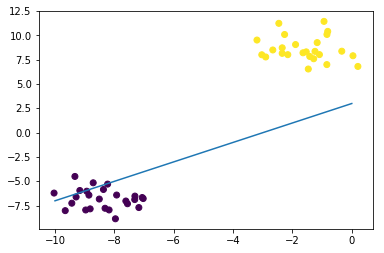

In [211]:
x = np.linspace(-10, 0, 10)
y = x + 3
plt.scatter(features[:, 0], features[:, 1], c =labels)
plt.plot(x, y)

### We have to vectorize the input features to feed it into the placeholder

In [212]:
np.array([1, 1]).dot(np.array([[-8], [-1]])) + 3

array([-6])

### Lets make an example session graph that can run this

In [213]:
g = Graph()

In [214]:
g.set_as_default()

In [215]:
x = Placeholder()

In [216]:
w = Variable([1, 1])

In [217]:
b = Variable(3)

In [218]:
z = add(matmul(w, x), b)

In [219]:
a = Sigmoid(z)

In [220]:
sess = Session()

In [221]:
sess.run(operation = a, feed_dict={x : [8, 10]})

0.99999999924174388

In [222]:
sess.run(operation = a, feed_dict={x : [2, -10]})

0.0066928509242848554